<a href="https://www.bigdatauniversity.com/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Clasificación con Python</font></h1>


En este cuaderno trataremos de practicar todos los algoritmos de clasificación aprendidos durante el curso.

Cargaremos un conjunto de datos mediante la librería Pandas, aplicaremos los siguientes algoritmos y encontraremos el mejor para este conjunto en específico con métodos precisos de evaluación.

Cargemos primero las librerías necesarias:


In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import pylab as pl
import scipy.optimize as opt
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline



### Acerca del conjunto de datos


Este conjunto de datos es sobre prestamos pasados. El conjunto **Loan_train.csv** incluye detalles sobre 346 clientes cuyos prestamos estan pagados o pendientes de cobrar.

| Campo          | Descripción                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | El prestamos puede estar pagado o pendiente                                           |
| Principal      | Cantidad del prestamo principal                                                       |
| Terms          | Términos del cobro del prestamo, que pueden ser semanales, quincenales o mensuales    |
| Effective_date | La fecha cuando el prestamo fue creado                                                |
| Due_date       | Debido a que se programa para pagarse una sola vez, solo hay una fecha de vencimiento |
| Age            | Edad del solicitante                                                                  |
| Education      | Escolaridad del solicitante                                                           |
| Gender         | Genero del solicitante                                                                |


Descargemos el conjunto de datos


In [27]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2023-05-21 18:04:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

2023-05-21 18:04:26 (28.6 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Cargar datos desde el archivo CSV


In [28]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [29]:
df.shape

(346, 10)

### Convertir a un objeto de tipo fecha(date)/tiempo(time)


In [30]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Visualización de los Datos y pre procesamiento


Veamos cuantas de cada clase existen en el conjunto de datos.


In [31]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 personas han saldado el préstamo a tiempo, mientras 86 han sido llamados a pagar


Grafiquemos algunas columnas para entender mejor los datos:


In [32]:
# observación: la instalación de seaborn puede tomar algunos minutos
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



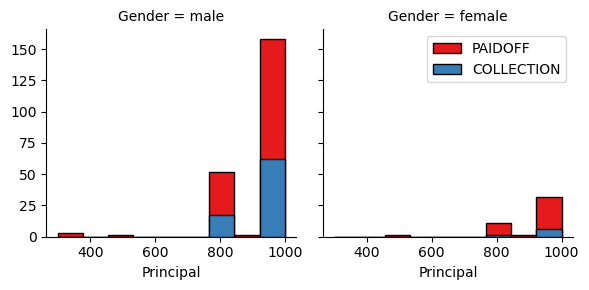

In [33]:

"""
Este código utiliza la biblioteca NumPy (importada como np) y la biblioteca Seaborn (importada como sns) para visualizar un histograma de la columna 'Principal' en un DataFrame llamado df.

Aquí está la explicación línea por línea:

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10): Crea una lista de 10 valores espaciados de manera uniforme entre el valor
mínimo y máximo de la columna 'Principal' en el DataFrame df. Estos valores se utilizarán para definir los intervalos del histograma.

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2): Crea una cuadrícula de gráficos (FacetGrid) utilizando 
el DataFrame df. Los gráficos se organizarán en función de la columna 'Gender' y se colorearán según la columna 'loan_status' utilizando la
paleta de colores 'Set1'. La opción col_wrap=2 indica que se deben mostrar 2 gráficos por fila.

g.map(plt.hist, 'Principal', bins=bins, ec="k"): Mapea la función plt.hist de Matplotlib a cada gráfico de la cuadrícula g. Esto significa 
que se generará un histograma para la columna 'Principal' en cada gráfico de la cuadrícula. La opción bins=bins se utiliza para especificar 
los intervalos del histograma que se calcularon anteriormente. La opción ec="k" establece el color de los bordes del histograma en negro.

g.axes[-1].legend(): Agrega una leyenda al último gráfico de la cuadrícula g. La leyenda mostrará las etiquetas de 'loan_status' para indicar 
qué color corresponde a cada estado de préstamo.

plt.show(): Muestra todos los gráficos generados.

En resumen, este código genera un conjunto de histogramas de la columna 'Principal' en el DataFrame df, separados por género y coloreados 
según el estado del préstamo. La cuadrícula de gráficos facilita la comparación de los histogramas entre diferentes géneros y estados de 
préstamo.
"""
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

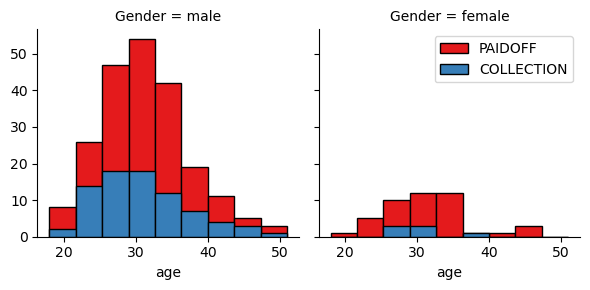

In [34]:


"""
Este código utiliza la biblioteca NumPy (importada como np), la biblioteca Seaborn (importada como sns) y la biblioteca Matplotlib (importada 
como plt) para visualizar un histograma de la columna 'age' en un DataFrame llamado df.

Aquí está la explicación línea por línea:

bins = np.linspace(df.age.min(), df.age.max(), 10): Crea una lista de 10 va
lores espaciados de manera uniforme entre el valor mínimo y máximo 
de la columna 'age' en el DataFrame df. Estos valores se utilizarán para definir los intervalos del histograma.

g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2): Crea una cuadrícula de gráficos (FacetGrid) utilizando el 
DataFrame df. Los gráficos se organizarán en función de la columna 'Gender' y se colorearán según la columna 'loan_status' utilizando la paleta de colores 'Set1'. La opción col_wrap=2 indica que se deben mostrar 2 gráficos por fila.

g.map(plt.hist, 'age', bins=bins, ec="k"): Mapea la función plt.hist de Matplotlib a cada gráfico de la cuadrícula g. Esto significa que se 
generará un histograma para la columna 'age' en cada gráfico de la cuadrícula. La opción bins=bins se utiliza para especificar los intervalos 
del histograma que se calcularon anteriormente. La opción ec="k" establece el color de los bordes del histograma en negro.

g.axes[-1].legend(): Agrega una leyenda al último gráfico de la cuadrícula g. La leyenda mostrará las etiquetas de 'loan_status' para indicar 
qué color corresponde a cada estado de préstamo.

plt.show(): Muestra todos los gráficos generados.

En resumen, este código genera un conjunto de histogramas de la columna 'age' en el DataFrame df, separados por género y coloreados según el 
estado del préstamo. La cuadrícula de gráficos facilita la comparación de los histogramas entre diferentes géneros y estados de préstamo.
"""

bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre procesamiento: selección/extracción de características


### Veamos el día de la semana en que la gente obtuvo el préstamo


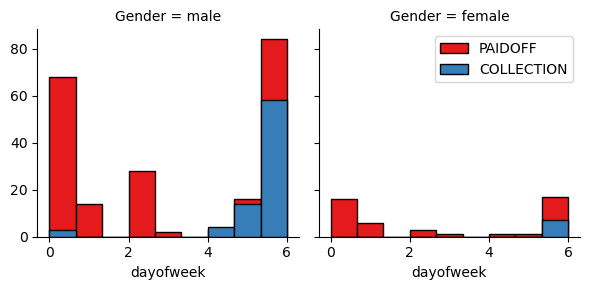

In [35]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


Observamos que la gente que obtuvo el préstamo al final de la semana no lo pagó. Utilicemos la binarización para establecer unos valores límite menores de 4


In [36]:


"""Este código agrega una nueva columna llamada 'weekend' al DataFrame df y asigna valores binarios a esta columna según el valor de la columna
existente 'dayofweek'.

Aquí está la explicación línea por línea:

df['weekend']: Se crea una nueva columna llamada 'weekend' en el DataFrame df. Esta columna contendrá los valores que serán asignados en la 
siguiente línea.

df['dayofweek'].apply(lambda x: 1 if (x>3) else 0): La columna 'dayofweek' se recorre mediante el método apply que aplica una función lambda
a cada valor de la columna. La función lambda se define como: si el valor x de 'dayofweek' es mayor que 3 (es decir, si es viernes, sábado o 
domingo), se asigna el valor 1; de lo contrario, se asigna el valor 0.

En resumen, este código crea una nueva columna llamada 'weekend' en el DataFrame df que indica si cada día corresponde a un fin de semana (1)
o no (0), en función del valor de la columna 'dayofweek'. El método apply con la función lambda se utiliza para aplicar la lógica de 
asignación a cada valor de la columna 'dayofweek'. La función lambda evalúa si el valor es mayor que 3 para determinar si es un día de fin de
semana o no."""

df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convertir características categóricas en valores numéricos


Observemos la característica de genero:


In [37]:
"""Aquí está la explicación línea por línea:

df.groupby(['Gender']): Esto agrupa el DataFrame df por la columna 'Gender'. Crea grupos separados para cada valor único en la columna 'Gender'.

['loan_status']: Esto selecciona la columna 'loan_status' del DataFrame para realizar el conteo.

value_counts(normalize=True): Esta función cuenta las ocurrencias de cada valor único en la columna 'loan_status' dentro de cada grupo de 
'Gender'. El parámetro normalize=True se utiliza para calcular el conteo normalizado, es decir, el porcentaje de cada valor único en relación 
con el total de valores en cada grupo.

En resumen, este código calcula la distribución de 'loan_status' (el estado del préstamo) dentro de cada grupo de 'Gender' en el DataFrame 
df. Proporciona el porcentaje de cada estado de préstamo en relación con el total de préstamos en cada grupo."""


df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86% de las mujeres pagan sus prestamos mientras que el 73% de los hombres lo hacen.


Convirtamos en 0 a los hombres y a las mujeres en 1:


In [38]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Codificación One Hot

#### ¿Qué hay acerca de la educación?


In [39]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Característica antes de la codificación One Hot


In [40]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Utilice la técnica de codificación One Hot para transformar las variables categóricas en binarias y agrégelas al dataframe de características


In [41]:
"""Aquí está la explicación línea por línea:

Feature = df[['Principal','terms','age','Gender','weekend']]: Se crea un nuevo DataFrame llamado Feature seleccionando las columnas 'Principal'
, 'terms', 'age', 'Gender' y 'weekend' del DataFrame original df. Esto se logra mediante el uso de la notación de doble corchete, que permite 
seleccionar múltiples columnas.

Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1): Se utiliza la función pd.concat() de Pandas para concatenar el 
DataFrame Feature con un nuevo DataFrame obtenido a través de pd.get_dummies(df['education']). La función pd.get_dummies() crea columnas 
binarias (codificación one-hot) a partir de la columna 'education' en df, donde cada categoría única en 'education' se convierte en una 
columna separada en el nuevo DataFrame.

Feature.drop(['Master or Above'], axis = 1,inplace=True): Se utiliza el método drop() para eliminar la columna 'Master or Above' del DataFrame
Feature. El parámetro axis=1 indica que se debe eliminar una columna, y inplace=True asegura que se realice la eliminación directamente en el
DataFrame Feature.

Feature.head(): Muestra las primeras filas del DataFrame Feature resultante después de realizar todas las manipulaciones anteriores.

En resumen, este código selecciona un subconjunto de columnas del DataFrame original df y crea un nuevo DataFrame llamado Feature. Luego, 
aplica codificación one-hot a la columna 'education' y elimina una columna específica. El resultado final es el DataFrame Feature que contiene
las características seleccionadas y codificadas para su posterior procesamiento o análisis."""


Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Selección de característica


Definamos los conjuntos de características, X (Variable(s) dependiente(s) ):


In [42]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


¿Cuales son nuestras etiquetas? (Variable dependiente u objetivo)


In [43]:
"""Aquí está la explicación línea por línea:

y = df['loan_status'].values: Se crea una nueva variable llamada y y se asignan los valores de la columna 'loan_status' del DataFrame df a 
esta variable. El atributo .values se utiliza para extraer los valores de la columna como un arreglo NumPy.

y[0:5]: Esto accede a los primeros cinco elementos de y. La notación y[0:5] se utiliza para obtener un subconjunto de elementos de y, desde el
elemento en la posición 0 hasta el elemento en la posición 4. Al imprimir o mostrar este subconjunto, se obtiene una visualización de los 
primeros cinco valores de y."""

y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Datos Normalizados


La estandarización de los datos le da a estos una media de cero y varianza con valor de la unidad (tecnicamente debería hacerse despues de la división entre grupos de prueba y entrenamiento)


In [44]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Clasificación


Ahora es su turno, utilice el conjunto de entrenamiento para construir un modelo preciso. Despues use el conjunto de validación para reportar la precisión del modelo.
Deberá utilizar el siguiente algoritmo:

*   K Nearest Neighbor(KNN)
*   Arbol de Decisión
*   Maquina de Soporte Vectorial (SVM)
*   Regresión Logística

**Observaciónes:**

*   Puede ir arriba y cambiar el pre procesamiento, la selección y extracción de características, etc, para mejorar el modelo.
*   Deberá utilizar alguna de las librerías para el desarrollo de algoritmos de clasificación; ya sea scikit-learn, Scipy o Numpy
*   Deberá incluir el código del algoritmo en las siguientes celdas.


# K Nearest Neighbor(KNN)

Observación: Deberá encontrar el mejor valor de k para construir el modelo con la mejor eficacia.
**Advertencia:** No deberá utilizar **loan_test.csv** para encontrar el mejor valor de k, sin embargo, puede dividir train_loan.csv para entrenamiento y pruebas para encontrar el mejor valor de **k**.


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Set de Entrenamiento:', X_train.shape,  y_train.shape)
print ('Set de Prueba:', X_test.shape,  y_test.shape)

Set de Entrenamiento: (276, 8) (276,)
Set de Prueba: (70, 8) (70,)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: di

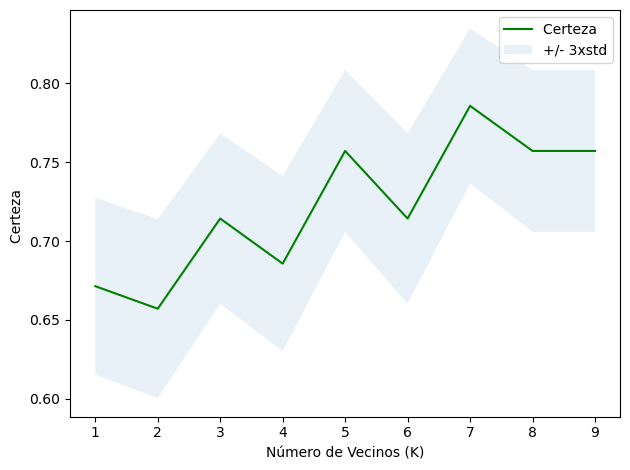

La mejor aproximación de certeza fue con  0.7857142857142857 con k= 7


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Entrenar el Modelo y Predecir  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
plt.tight_layout()
plt.show()

print( "La mejor aproximación de certeza fue con ", mean_acc.max(), "con k=", mean_acc.argmax()+1) 

In [47]:
k = 7
#Entrenar el Modelo y Predecir  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
yhat[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: di

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [48]:
#classification accuracy score computa la certeza del subconjunto. Esta función es igual a la función jaccard_similarity_score:

from sklearn import metrics
print("Entrenar el set de Certeza: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Probar el set de Certeza: ", metrics.accuracy_score(y_test, yhat))

Entrenar el set de Certeza:  0.8079710144927537
Probar el set de Certeza:  0.7857142857142857


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7766540244416351

In [51]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7857142857142857

# Arbol de Decisión


In [52]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [53]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])


['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt
#Accuracy classification score calcula la precisión del subconjunto
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(y_test, predTree))

Precisión de los Arboles de Decisión:  0.6142857142857143


In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7766540244416351

In [57]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7857142857142857

# Maquina de Soporte Vectorial (SVM)


In [58]:
import pylab as pl
import scipy.optimize as opt
from sklearn import svm

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

In [59]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat = clf.predict(X_test)
yhat [0:5]

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [60]:
#f1_score de la librería sklearn:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7275882012724117

In [62]:
 #Índice jaccard
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7428571428571429

# Regresión Logística


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
yhat = LR.predict(X_test)
yhat

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF'], dtype=object)

In [65]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.5034238 , 0.4965762 ],
       [0.45206111, 0.54793889],
       [0.30814132, 0.69185868],
       [0.34259428, 0.65740572],
       [0.32025894, 0.67974106],
       [0.31680537, 0.68319463],
       [0.48830185, 0.51169815],
       [0.47823073, 0.52176927],
       [0.34259428, 0.65740572],
       [0.4934056 , 0.5065944 ],
       [0.33806706, 0.66193294],
       [0.49662231, 0.50337769],
       [0.24891907, 0.75108093],
       [0.3419095 , 0.6580905 ],
       [0.43751789, 0.56248211],
       [0.25760497, 0.74239503],
       [0.52357188, 0.47642812],
       [0.30450278, 0.69549722],
       [0.50166363, 0.49833637],
       [0.3195971 , 0.6804029 ],
       [0.44276988, 0.55723012],
       [0.49410185, 0.50589815],
       [0.51350333, 0.48649667],
       [0.47203498, 0.52796502],
       [0.40944694, 0.59055306],
       [0.50846442, 0.49153558],
       [0.51098415, 0.48901585],
       [0.37457647, 0.62542353],
       [0.50418423, 0.49581577],
       [0.25299635, 0.74700365],
       [0.

In [66]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.6670522459996144

In [78]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6857142857142857

In [79]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5772287609479654

# Evaluación del Modelo con el Conjunto de Prueba


In [80]:

from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Primero descarge y carge el conjunto de pruebas:


In [81]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2023-05-21 18:15:06--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2023-05-21 18:15:06 (24.8 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Cargar el conjunto de prueba para la evaluación


In [82]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [83]:
test_df = pd.read_csv('loan_test.csv')
#Cambiar el formato de fecha
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
#Agregar una columna que especifica si es fin de semana  o no
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
# Convertir genero en valores binarios
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
# Crear un Dataframe 'Featuretest' con las variables independientes y concatenar con la columna 'education' codificada en oneHot-encoding.
Featuretest = test_df[['Principal','terms','age','Gender','weekend']]
Featuretest = pd.concat([Featuretest,pd.get_dummies(test_df['education'])], axis=1)
#De la columna 'education' codificada en oneHot-encoding eliminamos'Master or Above'
Featuretest.drop(['Master or Above'], axis = 1,inplace=True)
Featuretest.head()

#Definamos los conjuntos de características, X_test(Variable(s) dependiente(s) ):
XT = Featuretest
#Definamos la variable objetivo 'y'dependiente:
yT = test_df['loan_status'].values

#Normalizamos los datos
XT= preprocessing.StandardScaler().fit(XT).transform(XT)
#test_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:23: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


In [93]:
#K Nearest Neighbor(KNN)
yhat = neigh.predict(XT)
yhat[0:5]
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print('jaccard:',jaccard_similarity_score(yT, yhat))

f1_score: 0.6328400281888654
jaccard: 0.6666666666666666


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:442: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


In [94]:
#Arbol de Decisión
predTree = drugTree.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print('jaccard:',jaccard_similarity_score(yT, yhat))

f1_score: 0.6328400281888654
jaccard: 0.6666666666666666


In [95]:
#Maquina de Soporte Vectorial (SVM)
yhat = clf.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print('jaccard:',jaccard_similarity_score(yT, yhat))

f1_score: 0.7583503077293734
jaccard: 0.7962962962962963


In [96]:
#Regresión Logística
yhat = LR.predict(XT)
from sklearn.metrics import f1_score
print('f1_score:',f1_score(yT, yhat, average='weighted'))
from sklearn.metrics import jaccard_similarity_score
print('jaccard:',jaccard_similarity_score(yT, yhat))
from sklearn.metrics import log_loss
yhat_prob2 = LR.predict_proba(XT)
print('log_loss:',log_loss(yT, yhat_prob2))

f1_score: 0.6604267310789049
jaccard: 0.7407407407407407
log_loss: 0.5672153379912981


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


# Reporte

Deberá reportar la precisión del modelo utilizando distintas métricas de evaluación:


| Algoritmo           | Jaccard | F1     | LogLoss |
| ------------------- | ------- | --     | ------- |
| KNN                 |0.66      |0.63   | NA      |
| Arbol de Decisión   |0.66     |0.63    | NA      |
| SVM                 |0.79      |0.75   | NA      |
| Regresión Logística |0.74     |0.66    | 0.56  |


<h2>¿Quiere aprender mas?</h2>

IBM SPSS Modeler es una plataforma para el análisis que contiene muchos algoritmos de aprendizaje automático (machine learning). Ha sido diseñado con el fin de ofrecer predicciones inteligentes a las decisiones hechas por personas, grupos, sistemas - con la compañia como un todo. Una prueba gratuita esta disponible a traves de este curso desde aqui: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">SPSS Modeler</a>

Además, puede utilizar Watson Studio para ejecutar estos cuardernos mas rápido y con conjuntos de datos mas grandes. Watson Studio es la solución líder de IBM en la nube para científicos de datos, contruido por científicos de datos. Con los cuadernos de Jupyter, RStudio, Apache Spark y librerías pre instaladas en la nube, Watson Studio permite a los científicos de datos colaborar en sus proyectos sin necesidad de instalar nada. Unase a la gran comunidad de usuarios de Watson Studio hoy con un cuenta gratuita en <a href="https://cloud.ibm.com/registration/trial?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Watson Studio</a>

<h3>Gracias por terminar esta lección</h3>

<h4>Autor:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD es un Científico de Datos para IBM con una trayectoria de desarrollo de aplicaciones a nivel empresarial que han ayudado a mejorar la habilidad de transformar información en conocimiento practico. Es un investigador en el campo de la minería de datos y experto en el desarrollo de métodos analíticos avanzados como son el aprendizaje automático y el modelado estadístico de grandes conjuntos de datos.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ESedX20816812-2022-01-01">MIT License</a>.</p>
